In [ ]:
# Import all libaries that are necessary for the Clustering Model
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
sns.set_theme(color_codes=True)

In [ ]:
# To upload the files
files.upload()

In [ ]:
# Function that loads the data file.
def load_data(excel_document):
  # Loading the data
  df = pd.read_excel(excel_document)
  # Removing trailing and White spaces
  df.columns = df.columns.str.strip()

  return df

In [ ]:
# Loading the Dataset
df = load_data('Clustering Data.xlsx')

In [ ]:
# Printing the columns within the dataset
print(df.columns)

Index(['Caribbean Countries', 'Population', 'Land Size', 'Crime Rate', 'GDP'], dtype='object')


In [ ]:
# Printing the Entire dataset to pandas Dataframe
df.head(14)

,Caribbean Countries,Population,Land Size,Crime Rate,GDP
0,Antigua & Barbuda,102195,442,64.08,1.857143e+09
1,The Bahamas,402200,13939,62.06,1.323165e+10
2,Barbados,290000,430,47.13,5.912548e+09
3,Cuba,11012000,109884,23.33,1.552865e+10
4,Dominica,74656,751,56.25,6.591337e+08
5,Dominican Republic,10720000,48223,61.02,1.149952e+11
6,Grenada,110000,344,26.70,1.264479e+09
7,Haiti,12230000,27065,78.30,1.809889e+10
8,Saint Kitts & Nevis,60000,263,20.22,1.039845e+09
9,Jamaica,2749000,10991,67.42,1.761502e+10


In [ ]:
# Selecting the columns to use for clustering and storing them in a list called Features
features = ['Population', 'Land Size', 'Crime Rate', 'GDP']
X = df.loc[:, features].values

In [ ]:
# Scaling the data to ensure fair distance computations
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)

In [ ]:
# Printing the datatypes for each of the dataset columns.
print(df.dtypes)

Caribbean Countries     object
Population              object
Land Size                int64
Crime Rate             float64
GDP                    float64
dtype: object


In [ ]:
# Checking the scaled features in the numpy array to ensure that there are fair distance computations.
scaled_features

array([[-0.6367321 , -0.54302022,  0.67258045, -0.51108316],
       [-0.57160758, -0.09511067,  0.56321846, -0.12531139],
       [-0.59596374, -0.54341845, -0.24508582, -0.37354219],
       [ 1.7315477 ,  3.08890661, -1.53360837, -0.04740749],
       [-0.64271021, -0.53276579,  0.24866736, -0.5517142 ],
       [ 1.6681609 ,  1.04263333,  0.50691327,  3.32604878],
       [-0.6350378 , -0.54627243, -1.35115791, -0.53118364],
       [ 1.99594883,  0.34048692,  1.44244561,  0.03976325],
       [-0.64589171, -0.54896049, -1.70198254, -0.53880222],
       [-0.06216868, -0.19294259,  0.85340673,  0.02335283],
       [-0.61984233, -0.53724588,  0.30388976, -0.49320879],
       [-0.6350378 , -0.54477907, -0.84062145, -0.54028351],
       [-0.35066548, -0.38751128,  1.08133446,  0.32337172]])

## Show the Elbow Method Graph

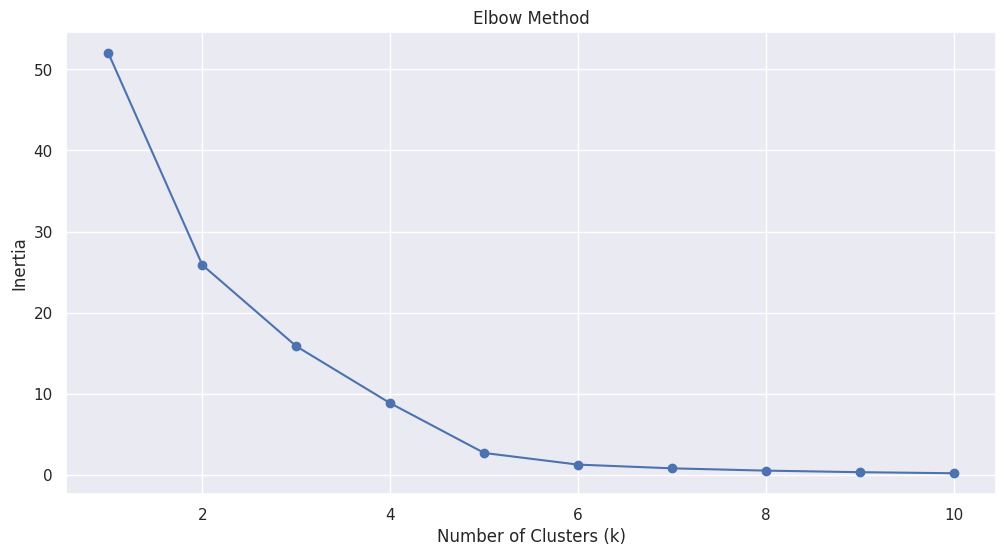

In [ ]:
import warnings
# To ignore all warnings that may show when this block of code is being runned
warnings.filterwarnings("ignore")

# Creating a function that computues and visualizes the Elbow Method

def find_optimal_k_elbow(X,max_k):
  inertias = []
  for k in range (1, max_k + 1):
    kmeans= KMeans(n_clusters=k, random_state= 42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

  # Plotting Elbow Graph
  plt.figure(figsize=(12,6))
  plt.plot(range(1,max_k + 1), inertias, marker = 'o')
  plt.xlabel('Number of Clusters (k)')
  plt.ylabel('Inertia')
  plt.title('Elbow Method' )
  plt.show()

# Finding the optimal k using the Elbow Method
max_k = 10
find_optimal_k_elbow(scaled_features, max_k)

# Show the Silhouette Score Graph

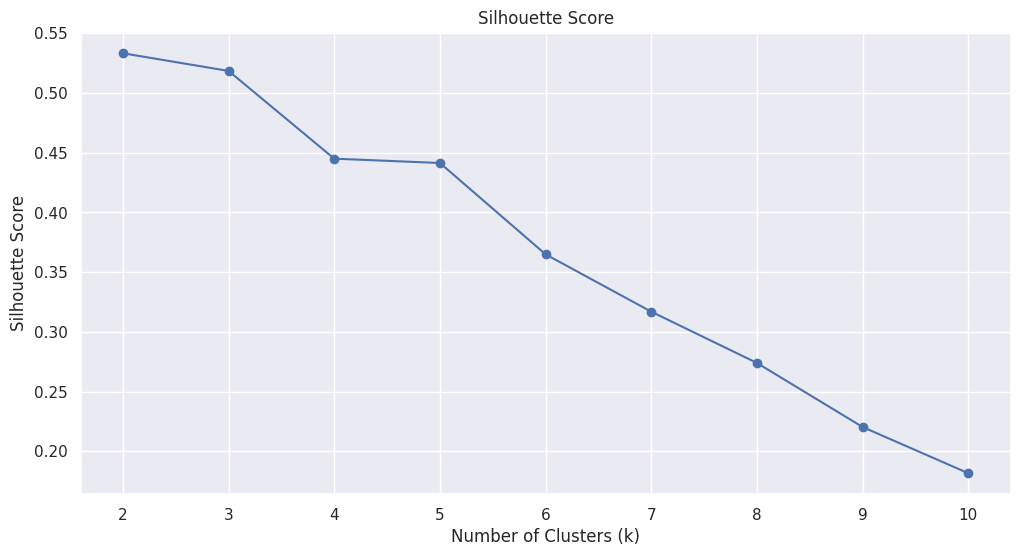

In [ ]:
import warnings
# To ignore all warnings that may show when this block of code is being runned
warnings.filterwarnings("ignore")

# Importing the sklearn's silhouette_score to compute and visualize the silhouette score
from sklearn.metrics import silhouette_score

# Creating a function that computues and visualizes the Silhouette Score
def find_optimal_k_silhouette(X , max_k):
  silhouette_scores = []
  for k in range(2 , max_k + 1):
    kmeans= KMeans(n_clusters=k, random_state= 42)
    kmeans.fit(X)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(X, labels))

  # Plotting Silhouette Score Graph
  plt.figure(figsize=(12,6))
  plt.plot(range(2,max_k + 1), silhouette_scores, marker = 'o')
  plt.xlabel('Number of Clusters (k)')
  plt.ylabel('Silhouette Score')
  plt.title('Silhouette Score' )
  plt.show()

# Finding the optimal k using the Elbow Method
max_k = 10
find_optimal_k_silhouette(scaled_features, max_k)


## Making 5 Clusters

In [ ]:
# Optimal number of clusters based on the elbow method
n_clusters = 5

# Performing KMeans Clustering with the optimal number of clusters as determined by the elbow method.
kmeans = KMeans(n_clusters = n_clusters, random_state=42)
df['label'] = kmeans.fit_predict(scaled_features)

In [ ]:
print(pd.DataFrame(scaled_features, columns=features).head(14))

    Population  Land Size  Crime Rate       GDP
0    -0.636732  -0.543020    0.672580 -0.511083
1    -0.571608  -0.095111    0.563218 -0.125311
2    -0.595964  -0.543418   -0.245086 -0.373542
3     1.731548   3.088907   -1.533608 -0.047407
4    -0.642710  -0.532766    0.248667 -0.551714
5     1.668161   1.042633    0.506913  3.326049
6    -0.635038  -0.546272   -1.351158 -0.531184
7     1.995949   0.340487    1.442446  0.039763
8    -0.645892  -0.548960   -1.701983 -0.538802
9    -0.062169  -0.192943    0.853407  0.023353
10   -0.619842  -0.537246    0.303890 -0.493209
11   -0.635038  -0.544779   -0.840621 -0.540284
12   -0.350665  -0.387511    1.081334  0.323372


In [ ]:
# Printing the Entire dataset to pandas Dataframe
df.head(14)

,Caribbean Countries,Population,Land Size,Crime Rate,GDP,label
0,Antigua & Barbuda,102195,442,64.08,1.857143e+09,2
1,The Bahamas,402200,13939,62.06,1.323165e+10,2
2,Barbados,290000,430,47.13,5.912548e+09,2
3,Cuba,11012000,109884,23.33,1.552865e+10,3
4,Dominica,74656,751,56.25,6.591337e+08,2
5,Dominican Republic,10720000,48223,61.02,1.149952e+11,4
6,Grenada,110000,344,26.70,1.264479e+09,0
7,Haiti,12230000,27065,78.30,1.809889e+10,1
8,Saint Kitts & Nevis,60000,263,20.22,1.039845e+09,0
9,Jamaica,2749000,10991,67.42,1.761502e+10,2


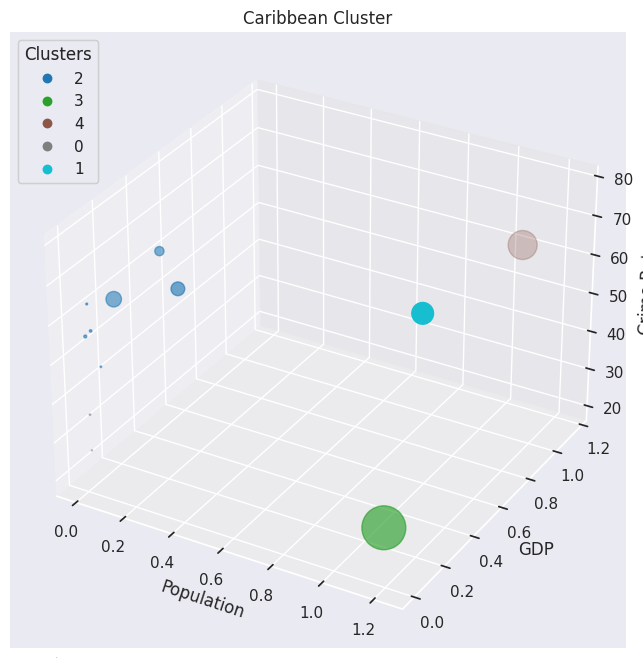

In [ ]:
# Importing the neccesary packages and libraries for the cluster visualization
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as mcolors

# Creating the 3D visulization for the cluster visualization
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Creating a colormap for the clusters
labels = df['label'].unique()
colors = plt.cm.get_cmap('tab10', len(labels))  # Using a colormap with enough colors for each of the clusters

# Creating a color map that maps each label to a unique color
color_map = {label: colors(i) for i, label in enumerate(labels)}

# Using 'Land Size' values to create sizes for the points
sizes = ((df['Land Size'] - df['Land Size'].min()) / (df['Land Size'].max() - df['Land Size'].min()) * 100) *10


# Plotting the data points
scatter = ax.scatter(df['Population'], df['GDP'], df['Crime Rate'], c=df['label'].map(color_map), s=sizes)

# Setting labels for the axes
ax.set_xlabel('Population')
ax.set_ylabel('GDP')
ax.set_zlabel('Crime Rate')

# Setting the Title
ax.set_title('Caribbean Cluster')

# Creating a legend for the clusters
handles = [plt.Line2D([],[],marker="o", ls="", color=color_map[label]) for label in labels]
legend1 = ax.legend(handles, labels, loc="upper left", title="Clusters")
ax.add_artist(legend1)

plt.show()
